In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
from pathlib import Path
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install yfinance
import yfinance as yf

In [ ]:
df = yf.download('NVDA', start='2018-01-01', end='2025-04-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2018-01-02,4.929429,4.933138,4.809500,4.841151,355616000
2018-01-03,5.253852,5.284267,5.038229,5.046883,914704000
2018-01-04,5.281548,5.391833,5.259293,5.335207,583268000
2018-01-05,5.326305,5.363643,5.219482,5.296385,580124000
2018-01-08,5.489506,5.563689,5.404938,5.449942,881216000


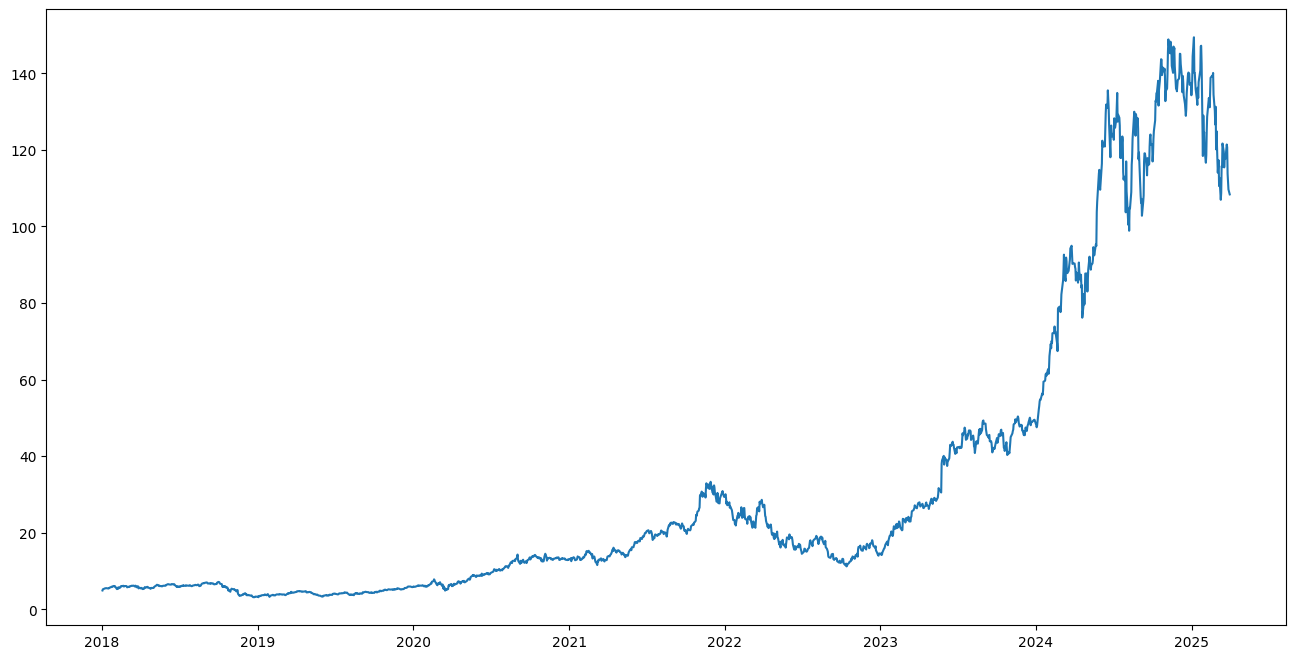

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='closing price')

In [ ]:
df.columns

MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [ ]:
df.dtypes

,,0
Price,Ticker,
Close,NVDA,float64
High,NVDA,float64
Low,NVDA,float64
Open,NVDA,float64
Volume,NVDA,int64


In [ ]:
df.isnull().sum()

,,0
Price,Ticker,
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']

# input features to predict whether customer buy or sell

In [ ]:
df['Open - Close']

,Open - Close
Date,
2018-01-02,-0.088277
2018-01-03,-0.206969
2018-01-04,0.053659
2018-01-05,-0.029920
2018-01-08,-0.039564
...,...
2025-03-25,-0.139999
2025-03-26,4.970001
2025-03-27,-0.080002


In [ ]:
df['High - Low']

,High - Low
Date,
2018-01-02,0.123638
2018-01-03,0.246039
2018-01-04,0.132540
2018-01-05,0.144161
2018-01-08,0.158751
...,...
2025-03-25,2.370003
2025-03-26,6.129997
2025-03-27,3.789993


In [ ]:
X = df[['Open - Close', 'High - Low']] # selecting multiple columns so double brackets
X.head()

Price,Open - Close,High - Low
Ticker,,
Date,,
2018-01-02,-0.088277,0.123638
2018-01-03,-0.206969,0.246039
2018-01-04,0.053659,0.132540
2018-01-05,-0.029920,0.144161
2018-01-08,-0.039564,0.158751


# Classification: 1 = buy / 0 = sell

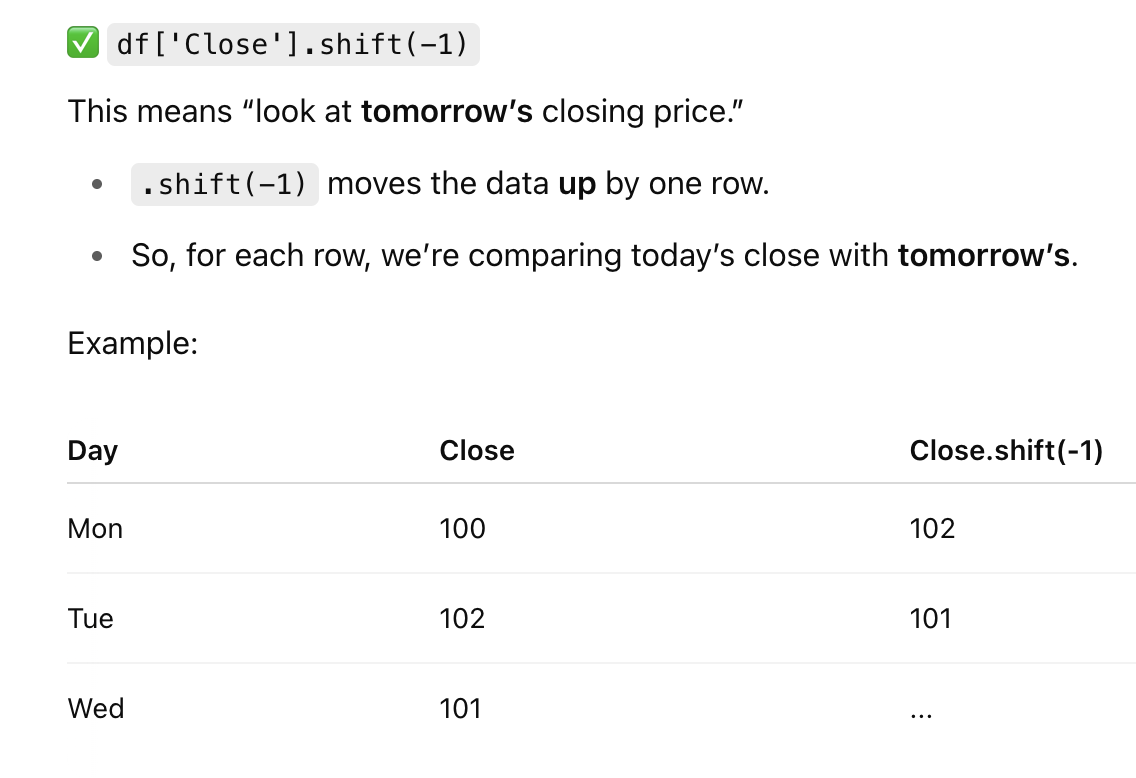

In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1) # np.where(condition, 1, -1)

# here the shift function (-1) = take a look at tomorrow's closing price
# If 1 the stock went up, if -1 then stock went down/remain same

# -1 is used in financial modelling or trading strategies

In [ ]:
y

array([[ 1],
       [ 1],
       [ 1],
       ...,
       [-1],
       [-1],
       [-1]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 44)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# we use grid search cv to find the value of k = minimum number of neighbors which I have to see when I have to predict the data
# what should be the optimal value of k?  (k is a hyperparameter = number of neighbors that we have)
# we use grid search cv for this

In [ ]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]} # we are telling the number of neighbors can range from 2 -15
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv = 5)


# model fit

model.fit(X_train, y_train.ravel())

# Accuracy score

accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))


print('Training data accuracy: %.2f' %accuracy_train)
print('Testing data accuracy: %.2f' %accuracy_test)

Training data accuracy: 0.67
Testing data accuracy: 0.51


In [ ]:
prediction = model.predict(X_test)

In [ ]:
actual_predicted_data = pd.DataFrame({
    'Actual class': y_test.ravel(),
    'Predicted class': prediction.ravel()
})

In [ ]:
actual_predicted_data.head(10)

,Actual class,Predicted class
0,1,1
1,-1,1
2,1,1
3,-1,-1
4,1,1
5,-1,-1
6,1,1
7,-1,1
8,-1,-1
9,1,1


In [ ]:
pd.crosstab(actual_predicted_data['Actual class'], actual_predicted_data['Predicted class'], rownames=['Actual'], colnames=['Predicted'])

Predicted,-1,1
Actual,,
-1,85,129
1,95,147


In [ ]:
pd.crosstab(actual_predicted_data['Actual class'], actual_predicted_data['Predicted class'],
            rownames = ['Actual'], colnames = ['Predicted'], normalize='index') * 100

Predicted,-1,1
Actual,,
-1,39.719626,60.280374
1,39.256198,60.743802


# regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors


from sklearn.model_selection import train_test_split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size = 0.25, random_state = 44)

params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]} # we are telling the number of neighbors can range from 2 -15
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv = 5)


# model fit

model_reg.fit(X_train_reg, y_train_reg.ravel())

prediction_reg = model_reg.predict(X_test_reg)

In [ ]:
print(prediction_reg)

[-0.06666667  0.33333333  0.06666667 -0.06666667  0.33333333 -0.2
  0.46666667  0.33333333 -0.6         0.06666667  0.06666667 -0.06666667
  0.2        -0.2         0.06666667  0.33333333 -0.06666667  0.06666667
  0.2         0.33333333  0.06666667 -0.33333333 -0.2        -0.06666667
  0.06666667  0.06666667 -0.2         0.46666667 -0.2         0.2
  0.06666667  0.33333333  0.2        -0.06666667  0.33333333 -0.2
  0.06666667  0.33333333  0.06666667  0.06666667  0.2         0.46666667
  0.6         0.33333333  0.06666667  0.2        -0.06666667  0.06666667
  0.6         0.06666667 -0.2         0.06666667 -0.46666667 -0.06666667
  0.33333333 -0.46666667 -0.2        -0.46666667  0.06666667 -0.06666667
  0.06666667  0.33333333  0.33333333  0.2         0.2         0.2
  0.06666667  0.33333333  0.33333333  0.2        -0.33333333 -0.33333333
  0.2         0.06666667  0.06666667 -0.33333333  0.2         0.46666667
  0.33333333  0.33333333 -0.33333333 -0.33333333  0.46666667  0.33333333
  0.2 

In [ ]:
# RMSE

rms = np.sqrt(np.mean(np.power((np.array(y_test_reg) - np.array(prediction_reg)), 2)))
rms

np.float64(1.0293322991365605)

In [ ]:
valid = pd.DataFrame({'Actual Close' : y_test_reg.ravel(),
                      'predicted close value' : prediction_reg.ravel()})

In [ ]:
valid.head(15)

,Actual Close,predicted close value
0,1,-0.066667
1,-1,0.333333
2,1,0.066667
3,-1,-0.066667
4,1,0.333333
5,-1,-0.200000
6,1,0.466667
7,-1,0.333333
8,-1,-0.600000
9,1,0.066667


In [ ]:
def download_stock_data(ticker, start_date = '2018-01-01', end_date ='2025-04-01'):
  data = yf.download(ticker, start=start_date, end=end_date) # this line downloade the data from yf (the parameters are passed)
  print(f'Downloaded {ticker} data: {data.shape[0]} rows.')
  return data   # the result is stored in a variable named data

# here in this function is called download_stock_data
# it takes three inputs (ticker, start_date, end_date)

In [ ]:
aapl = download_stock_data('AAPL')

[*********************100%***********************]  1 of 1 completed

Downloaded AAPL data: 1821 rows.


In [ ]:
aapl

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.479836,40.489237,39.774858,39.986353,102223600
2018-01-03,40.472790,41.017975,40.409344,40.543288,118071600
2018-01-04,40.660789,40.764187,40.437547,40.545642,89738400
2018-01-05,41.123722,41.210668,40.665487,40.757134,94640000
2018-01-08,40.970974,41.267063,40.872274,40.970974,82271200
...,...,...,...,...,...
2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600
2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100


In [ ]:
def descriptive(data): # this data parameter has the data pulled from yahoo finance
  print('Data Types', data.dtypes)
  print('Check null values', data.isnull().sum())
  print('Check duplicate rows', data.duplicated().sum())
  print('Check first 10 rows', data.head())

  # plotting the close price
  if 'Close' in data.columns:
    plt.figure(figsize=(16,8))
    plt.plot(data['Close'], label = 'closing price')
    plt.title('Closing price over time')
    plt.xlabel('Index')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.plot()
  else:
    print('Could not find close price')
  return data.describe()

# Here we created a function descriptive and passed in the parameter data


Data Types Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object
Check null values Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64
Check duplicate rows 0
Check first 10 rows Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.479836  40.489237  39.774858  39.986353  102223600
2018-01-03  40.472790  41.017975  40.409344  40.543288  118071600
2018-01-04  40.660789  40.764187  40.437547  40.545642   89738400
2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200


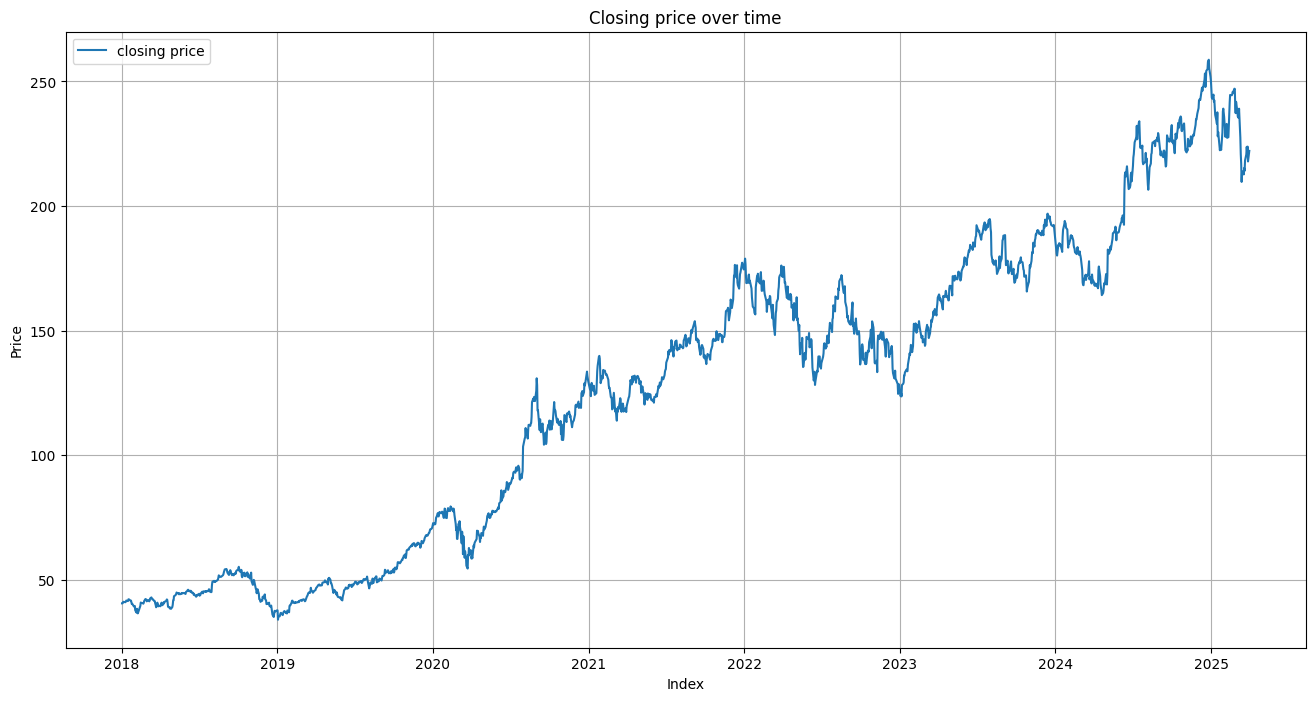

In [ ]:
aapl_summary = descriptive(aapl)

In [ ]:
def additional_columns(data):
  required_columns = ['Open', 'Close', 'High', 'Low']
  if not all(col in data.columns for col in required_columns):
    raise ValueError(f"Missing required columns: {required_cols}")

  data = data.copy()
  data['Open - Close'] = data['Open'] - data['Close']
  data['High - Low'] = data['High'] - data['Low']

  X = data[['Open - Close', 'High - Low']] # selecting multiple columns so double brackets
  X.head()
  y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
  return X, y

# here when I use the return statement, the variables is sent back to the wherever I called the function (X, y = additional_columns(aapl))
# the variables inside the function only exists when you return them

X, y = additional_columns(aapl)

In [ ]:
def knn(X, y, test_size = 0.25, random_state = 44):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

  params = {'n_neighbors': list(range(2, 16))} # we are telling the number of neighbors can range from 2 -15
  knn_class_model = neighbors.KNeighborsClassifier()
  model = GridSearchCV(knn_class_model, params, cv = 5)

  # model fit

  model.fit(X_train, y_train.ravel())

  #  Accuracy score

  accuracy_train = accuracy_score(y_train, model.predict(X_train))
  accuracy_test = accuracy_score(y_test, model.predict(X_test))

  print('Training data accuracy: %.2f' %accuracy_train)
  print('Testing data accuracy: %.2f' %accuracy_test)

  return accuracy_train, accuracy_test, model

accuracy_train, accuracy_test, model = knn(X, y) # we can call the return parameters inside the function at the same time outside


Training data accuracy: 0.65
Testing data accuracy: 0.52


In [ ]:
def prediction(model, X_test, y_test):
  prediction = model.predict(X_test)

  actual_predicted_data = pd.DataFrame({'Actual class': y_test.ravel(), 'Predicted class': prediction.ravel()})

  actual_predicted_data.head(10)

  confusion_counts = pd.crosstab(actual_predicted_data['Actual class'],
                    actual_predicted_data['Predicted class'],
                    rownames=['Actual'],
                    colnames=['Predicted'])
  print("\nConfusion Matrix (Counts):", confusion_counts)


  confusion_percentages = pd.crosstab(actual_predicted_data['Actual class'],
                          actual_predicted_data['Predicted class'],
                          rownames = ['Actual'],
                          colnames = ['Predicted'],
                          normalize='index') * 100
  print("\nConfusion Matrix (Percentages):", confusion_percentages)

  return actual_predicted_data, confusion_counts, confusion_percentages

In [ ]:
actual_predicted_data, confusion_counts, confusion_percentages = prediction(model, X_test, y_test)


Confusion Matrix (Counts): Predicted   -1    1
Actual             
-1         115   99
 1         120  122

Confusion Matrix (Percentages): Predicted         -1          1
Actual                         
-1         53.738318  46.261682
 1         49.586777  50.413223


In [ ]:
actual_predicted_data

,Actual class,Predicted class
0,1,-1
1,-1,-1
2,1,1
3,-1,-1
4,1,-1
...,...,...
451,1,-1
452,1,1
453,1,1
454,-1,1


In [ ]:
def knn_reg(X, y, test_size = 0.25, random_state = 44):
  X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size = test_size, random_state = random_state)

  params = {'n_neighbors':list(range(2, 16))} # we are telling the number of neighbors can range from 2 -15
  knn_reg_model = neighbors.KNeighborsRegressor()
  model_reg = GridSearchCV(knn_reg_model, params, cv = 5)

  # model fit
  model_reg.fit(X_train_reg, y_train_reg.ravel())
  prediction_reg = model_reg.predict(X_test_reg)

  return prediction_reg

In [ ]:
prediction_reg = knn_reg(X_train_reg, y_train_reg, test_size = 0.25, random_state = 44)
print(predictions)

[ 0.2        -0.2         0.46666667  0.06666667 -0.06666667 -0.06666667
  0.2         0.33333333  0.2         0.06666667  0.2        -0.06666667
 -0.2         0.33333333 -0.06666667  0.46666667  0.06666667  0.06666667
  0.46666667  0.46666667  0.6         0.33333333  0.2        -0.06666667
 -0.06666667  0.33333333 -0.06666667  0.46666667  0.2         0.6
 -0.06666667  0.6        -0.33333333 -0.2        -0.06666667 -0.2
  0.33333333  0.46666667  0.33333333  0.06666667  0.06666667  0.46666667
 -0.06666667 -0.2         0.06666667 -0.06666667  0.33333333  0.06666667
  0.46666667  0.06666667  0.06666667 -0.46666667  0.2         0.2
 -0.33333333 -0.06666667  0.06666667 -0.06666667 -0.33333333  0.33333333
  0.2         0.33333333 -0.2         0.46666667  0.06666667  0.2
  0.06666667 -0.2         0.2        -0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.2         0.2         0.2         0.33333333
  0.06666667  0.33333333  0.33333333  0.6        -0.2         0.06666667
 -0.2 

In [ ]:
def prediction_reg(model_reg, X_test, y_test):
  prediction = model.best_estimator_.predict(X_test)
  rms = np.sqrt(np.mean(np.power((np.array(y_test) - np.array(prediction)), 2)))
  valid = pd.DataFrame({
        'Actual Close': y_test.ravel(),
        'Predicted Close Value': prediction.ravel()
    })
  return rms, valid

In [ ]:
rms, valid = prediction_reg(model_reg, X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

TypeError: unsupported operand type(s) for -: 'int' and 'function'